<a href="https://colab.research.google.com/github/srodriguez5500/E-news-Express/blob/main/ENews_Express_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

# Description
Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

# Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?


# Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website
- group - Whether the user belongs to the first group (control) or the second group (treatment)
- landing_page - Whether the landing page is new or old
- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
- converted - Whether the user gets converted to a subscriber of the news portal or not
- language_preferred - Language chosen by the user to view the landing page


## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.26.0 pandas==2.1.4 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 14.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#show graphs inline
%matplotlib inline

#import library for statistical analysis
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 2 Business Statistics - E News/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#view first 5 rows of the data frame
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#view last 5 rows of the data frame
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#Indicate how many rows and columns there are
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns in the data frame.')

There are 100 rows and 6 columns in the data frame.


In [ ]:
#Review data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#Review statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
- There are no null values or duplicated entries.
- User ID is an integer data type, time spent is a float64 data type, group, landing page, converted and language preferred are of the object data type.
- The dataframe contains information for 100 users.
- There are 3 possible languages, with the most frequent being Spanish and French (later discovered in univariate analysis).
- For time spent on a page, the mean value is close to the median value, indicating a symmetrical distribution.
- The minimum amount of time spent on a page is 0.19 minutes and the maximum amount of time spent is 10.71 minutes.
- Overall, 54% of the users converted.

In [ ]:
#Check for null values
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
#check for duplicate entries
df.duplicated().sum()

0

### Univariate Analysis

**We will begin by exploring numerical columns.**

**Observations on time spent on the page**

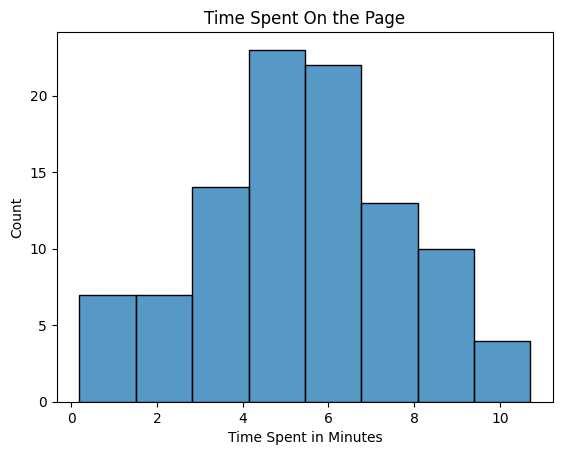

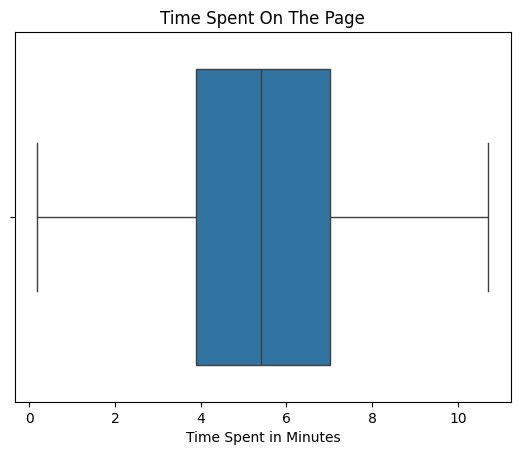

In [ ]:
#visualize histogram and boxplot
sns.histplot(data=df, x='time_spent_on_the_page')
plt.title('Time Spent On the Page')
plt.xlabel('Time Spent in Minutes')
plt.show();

sns.boxplot(data=df, x='time_spent_on_the_page')
plt.title('Time Spent On The Page')
plt.xlabel('Time Spent in Minutes')
plt.show();

- The minimum amount of time spent on a page is 0.19 minutes and the maximum amount of time spent is 10.71 minutes.
- The median time spent on a page is 5.415 minutes.
- The most common time spent on a page is 4 and 5 minutes.
- There are no outliers.

**Observations on Conversion**

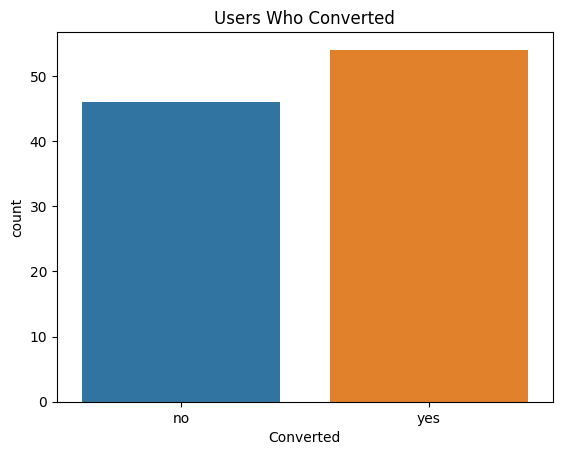

In [ ]:
sns.countplot(data=df, x='converted', hue='converted');
plt.title('Users Who Converted')
plt.xlabel('Converted');

In [ ]:
df['converted'].value_counts(normalize=True)

,proportion
converted,
yes,0.54
no,0.46


- 54% of the users converted overall.

**Observations on Language Preferred**

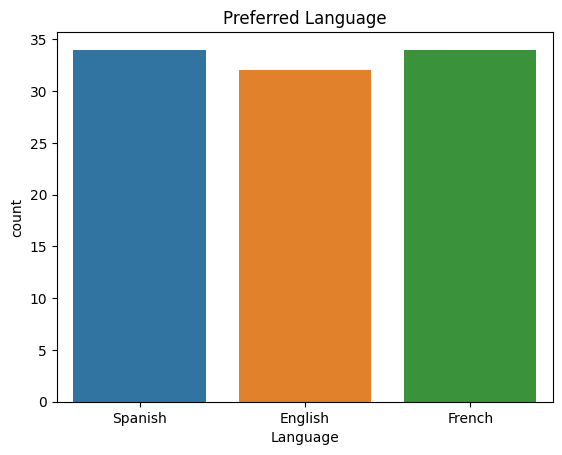

In [ ]:
sns.countplot(data=df, x='language_preferred', hue='language_preferred');
plt.title('Preferred Language')
plt.xlabel('Language');

In [ ]:
df['language_preferred'].value_counts(normalize=True)

,proportion
language_preferred,
Spanish,0.34
French,0.34
English,0.32


- All 3 languages have similar frequencies, with Spanish and French being used slightly more than English.

**Observations on group and landing page**

In [ ]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


In [ ]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


- It was stated that the sample of 100 users would be split into two equal groups, where the control group is assigned the existing landing page and the treatment group is assigned the new landing page.

### Bivariate Analysis

**Observations on time spent on the page and landing page.**

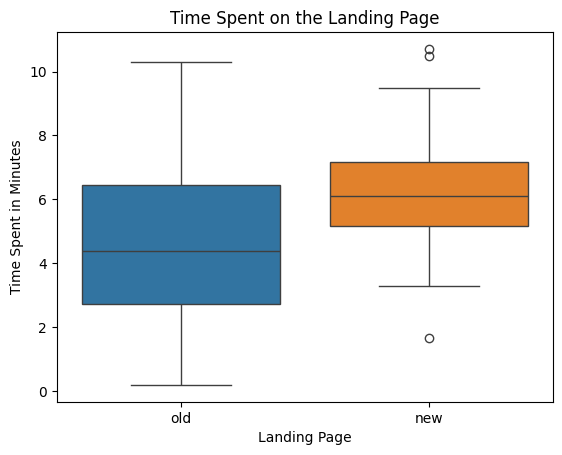

In [ ]:
#create boxplot of time spent on landing page
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page')
plt.title('Time Spent on the Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent in Minutes');

In [ ]:
#find mean time spent on old page
control_group=df[df['landing_page']=='old']
control_group['time_spent_on_the_page'].mean()

4.532400000000001

In [ ]:
#find mean time spent on new page
treatment_group=df[df['landing_page']=='new']
treatment_group['time_spent_on_the_page'].mean()

6.2232

- On average, users spent more time on the new landing page than the old one.
- Users assigned to the new landing page had slightly more unpredictable times spent on the page, indicated by outliers.
- 50% of the users in the control group spent 0.19 - 4.38 minutes on the existing page, where the median time spent is 4.38 minutes.
- 50% of users in the treatment group spent 3.3 - 6.1 minutes on the new page, where the median time spent is 6.1 minutes.

**Observations on time spent on the page and converted.**

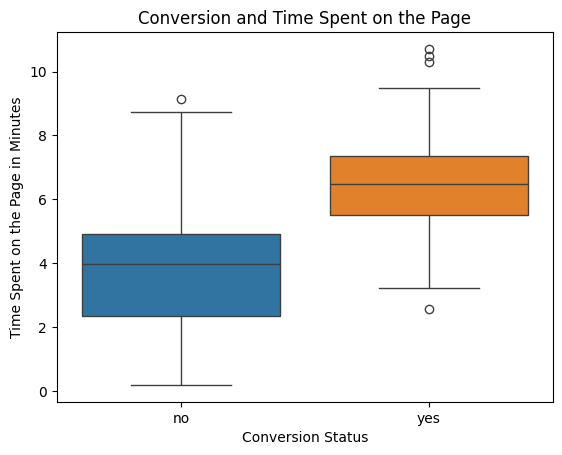

In [ ]:
#generate boxplot of conversion status and time spent on the page
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='converted')
plt.title('Conversion and Time Spent on the Page')
plt.xlabel('Conversion Status')
plt.ylabel('Time Spent on the Page in Minutes');

In [ ]:
#find mean of time spent on the page, sorted by conversion status

#converted mean
converted=df[df['converted']=='yes']
converted_mean = round(converted['time_spent_on_the_page'].mean(),2)
#non-converted mean
non_conv = df[df['converted']=='no']
non_conv_mean = round(non_conv['time_spent_on_the_page'].mean(),2)

print('The mean time spent on the page for users who converted is', converted_mean)
print('The mean time spent on the page for users who did not convert is', non_conv_mean)
print()

#converted minimum
converted_min = converted['time_spent_on_the_page'].min()
#non-converted minimum
non_conv_min = non_conv['time_spent_on_the_page'].min()

print('The minimum time spent on the page for users who converted is: ' + str(converted_min))
print('The minimum time spent on the page for users who did not convert is: ' + str(non_conv_min))
print()

#converted median
converted_med = converted['time_spent_on_the_page'].median()
#non-converted median
non_conv_med = non_conv['time_spent_on_the_page'].median()

print('The median time spent on the page for user who converted is: ' + str(round(converted_med,2)))
print('The median time spent on the page for user who did not converted is: ' + str(non_conv_med))

The mean time spent on the page for users who converted is 6.62
The mean time spent on the page for users who did not convert is 3.92

The minimum time spent on the page for users who converted is: 2.58
The minimum time spent on the page for users who did not convert is: 0.19

The median time spent on the page for user who converted is: 6.49
The median time spent on the page for user who did not converted is: 3.98


- On average, users who spent more time on their respective landing page converted to a subscriber.
- 50% of users who did not convert spent 0.19 - 3.98 minutes on the landing page, where the median time spent is 3.98 minutes.
- 50% of users who converted to subscribers spent 2.58 - 6.49 minutes on the landing page, where the median time spent is 6.49 minutes.
- Outliers exist for both user groups.

**Observations on time spent on the page and language preferred.**

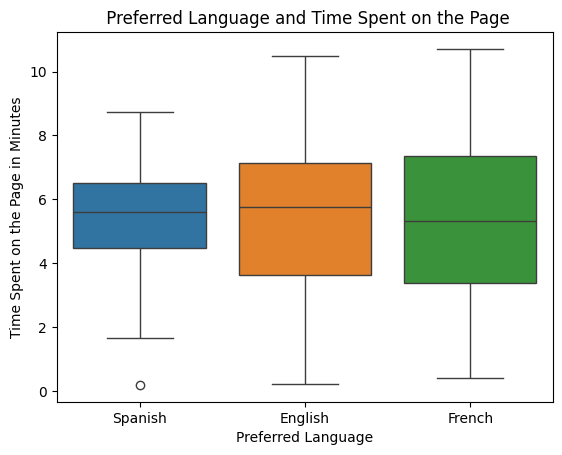

In [ ]:
#generate boxplot for language preferred and time spent on the page
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred')
plt.title(' Preferred Language and Time Spent on the Page')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on the Page in Minutes');

In [ ]:
#find average times spent on the landing page for each language.
spanish = df[df['language_preferred']=='Spanish']
span_avg_time = spanish['time_spent_on_the_page'].mean()

english = df[df['language_preferred']=='English']
eng_avg_time = english['time_spent_on_the_page'].mean()

french = df[df['language_preferred']=='French']
french_avg_time = french['time_spent_on_the_page'].mean()

print(f'Users who chose Spanish as their preferred language spent a mean time of {round(span_avg_time,2)} minutes on the landing page.')
print(f'Users who chose English as their preferred language spent a mean time of {round(eng_avg_time,2)} minutes on the landing page.')
print(f'Users who chose French as their preferred language spent a mean time of {round(french_avg_time,2)} minutes on the landing page.')

Users who chose Spanish as their preferred language spent a mean time of 5.33 minutes on the landing page.
Users who chose English as their preferred language spent a mean time of 5.56 minutes on the landing page.
Users who chose French as their preferred language spent a mean time of 5.25 minutes on the landing page.


- On average, users for all languages spent about 5 - 5.5 minutes on their respective landing pages.
- There exists an outlier for Spanish as a preferred language.
- Spanish as a preferred language has a more narrow distribution with time spent on the page ranging from 1.65 - 8.72 minutes.
- English and French as preferred languages have wider distributions with times ranging from about 0.2 - 11 minutes.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

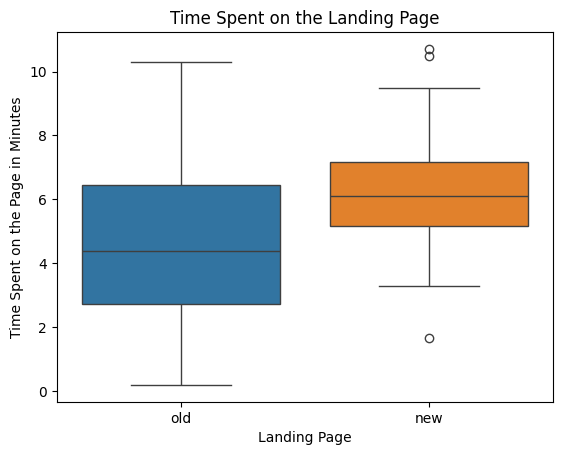

In [ ]:
#generate boxplots of time spent on the page separated by new and existing landing pages
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page')
plt.title('Time Spent on the Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page in Minutes');

### Step 1: Define the null and alternate hypotheses

Let $\mu_1$ equal the average time spent on the existing landing page and let $\mu_2$ equal the average time spent on the new landing page.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1 < \mu_2$

### Step 2: Select Appropriate test

The one-tailed, 2 Sample Independent t-test seems like it will be an appropriate test since we are comparing means of 2 independent populations and the standard deviation is unkown. Let's evaluate whether the criteria for this test have been met:

- Continuous data - Yes, the time spent on the landing page is continuous.
-Normally distributed populations- **To be established. We will confirm this using a Shapiro Wilk's test.**
- Independent populations - Yes, we are informed that random sampling occurred, before creating 2 equal and independent populations.
- Equal population standard deviations- **To be established.**
- Random sampling from the population - Yes. A simple random sample was taken.

**Shapiro-Wilk's Test for normality on dependent variable**
>$H_0:$ Time spent on the landing page follows a normal distribution.

>$H_a:$ Time spent on the landing page does not follow a normal distribution.

In [ ]:
#Shapiro-Wilk's Test
w, p_value = stats.shapiro(df['time_spent_on_the_page'])
print("The p-value for the Shapiro-Wilk's test for normality is", round(p_value,2))

The p-value for the Shapiro-Wilk's test for normality is 0.56


Given that the p-value is about 56%, we do not have enough evidence to reject the null hypothesis. Thus, we conclude that the response variable follows a normal distribution.

**Calculate Standard Deviation to Establish Equality**

In [ ]:
#compute mean and standard deviations of each group.
#recall that the variables control_group and treatment_group were created previously
print('For the control group, the standard deviation is ' + str(round(control_group['time_spent_on_the_page'].std(),2)) + ' and the mean is ' + str(round(control_group['time_spent_on_the_page'].mean(),2)))
print('For the treatment group, the standard deviation is ' + str(round(treatment_group['time_spent_on_the_page'].std(),2)) + ' and the mean is ' + str(round(treatment_group['time_spent_on_the_page'].mean(),2)))

For the control group, the standard deviation is 2.58 and the mean is 4.53
For the treatment group, the standard deviation is 1.82 and the mean is 6.22


In [ ]:
#find ratio of standard deviations large/small
ratio_of_std = round((control_group['time_spent_on_the_page'].std()) / (treatment_group['time_spent_on_the_page'].std()),2)
print(ratio_of_std)

1.42


Since the ratio of the larger to the smaller sample standard deviations is less than 2, we can assume that the standard deviations are equal.

**All assumptions of the 2 sample independent t-test have been met.**

### Step 3: Decide the significance level

Let α = 0.05.

### Step 4: Collect and prepare data

- It has been established that the standard deviations of the populations are equal in step 2. A normal distribution has also been established in step 2.

### Step 5: Calculate the p-value

In [ ]:
#import required function
from scipy.stats import ttest_ind

#find the p-value
#recall that the variables control_group and treatment_group were created previously
test_stat, p_value = ttest_ind(control_group['time_spent_on_the_page'], treatment_group['time_spent_on_the_page'], equal_var=True, alternative='less')
print(f'The p-value is {p_value}.')

The p-value is 0.0001316123528095005.


### Step 6: Compare the p-value with $\alpha$

- Given that the p-value is lower than our significance level, we have enough evidence to reject the null hypothesis.

### Step 7:  Draw inference

- We conclude that on average, users spend more time on the new landing page than the existing one.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###A visualization

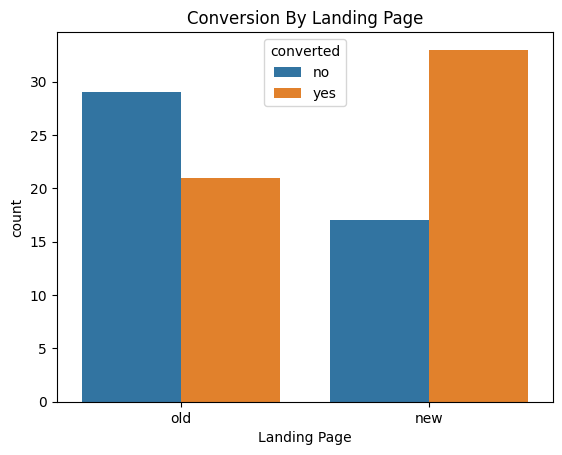

In [ ]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.title('Conversion By Landing Page')
plt.xlabel('Landing Page');

### Establish null and alternative hypotheses

Let $p_1$ represent the proportion of users who converted when visting the old landing page.

Let $p_2$ represent the proportion of users who converted when visiting
the new landing page.

- $H_0: p_1 ≥ p_2$

- $H_a: p_1<p_2$

### Choose an appropriate test
- A one tailed, 2 Sample Proportions Z-test would be appropriate for this investigation.

### Establish significance level
- Let α = 0.05.

###Data preparation

Determine of proportions z-test assumptions are satisfied:
- Binomial distribution in the population - Yes, either the user converted or did not.
- Random sampling from the population - Yes, this was stated previously.
- Binomial distribution approaches normality under the Central Limit Theorem.
- Ensure that $np≥10$ **and** $n(1-p)≥10$, where $n$= sample size and $p=$ sample proportion - **Established below.**

To determine if  $np≥10$ **and** $n(1-p)≥10$, we first must find the number of users who converted for each population respectively.




In [ ]:
#number of users who converted from control group
conv_control_total = control_group['converted'].value_counts()['yes']
print(f'The total number of users who converted from the control group is {conv_control_total}.')

#number of users who converted from treatment group
conv_treatment_total = treatment_group['converted'].value_counts()['yes']
print(f'The total number of users who converted from the treatment group is {conv_treatment_total}.')

The total number of users who converted from the control group is 21.
The total number of users who converted from the treatment group is 33.


Now we will calculate $p_1$ and $p_2$, the conversion ratios of each population respectively. Then, Boolean statemets will be used to determine if  $np≥10$ **and** $n(p=1)≥10$ for $p_1$ and $p_2$.

In [ ]:
#sample size of each population
n=50

#proportion of converted users for control group
p_1 = conv_control_total/n
print(f'The proportion of converted users for the control group is {p_1}.')

#proportion of converted users for treatment group
p_2 = conv_treatment_total/n
print(f'The proportion of converted users for the treatment group is {p_2}')
print()

#determine if n*p and n*(1-p) >= 10 for each population
print('For the control group, n*p greater than or equal to 10:', n*p_1 >= 10)
print('For the control group, n(1-p) greater than or equal to 10:', n*(1-p_1) >= 10)
print()

print('For the treatment group, n*p greater than or equal to 10:', n*p_2>=10)
print('For the treatment group, n(1-p) greater than or equal to 10:', n*(1-p_2) >= 10)

The proportion of converted users for the control group is 0.42.
The proportion of converted users for the treatment group is 0.66

For the control group, n*p greater than or equal to 10: True
For the control group, n(1-p) greater than or equal to 10: True

For the treatment group, n*p greater than or equal to 10: True
For the treatment group, n(1-p) greater than or equal to 10: True


- We conclude that all requirements have been met for a 2 sample proportions z-test.

### Find p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#set number of successes (users who converted calculated previously)
conversion_count = np.array([21, 33])

#set sample sizes
nobs = np.array([50,50])

#find the p-value
test_stat_2, p_value_2 = proportions_ztest(conversion_count, nobs, alternative='smaller')

print(f'The p-value is {round(p_value_2,3)}.')

The p-value is 0.008.


### Compare p-value to level of significance

- The p-value is less than the 5% level of significance.

###Draw a conclusion.

- Given that the p-value is less than 5%, we have enough evidence to reject the null hypothesis. We conclude that the conversion rate for the new page is greater than the conversion rate of the old page.

## 3. Is the conversion and preferred language are independent or related?

###Establish null and alternative hypothesis

$H_0:$ Preferred language and conversion status are independent.

$H_A:$ Preferred language and conversion status are dependent.

### Choose an appropriate test
- Chi square test of contingency needed

### Establish significance level
- Let α = 0.05.

###Data preparation

- To perform the chi square test of independence, we first need to construct a contigency table.

In [ ]:
#create a contigency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### A Visual Analysis

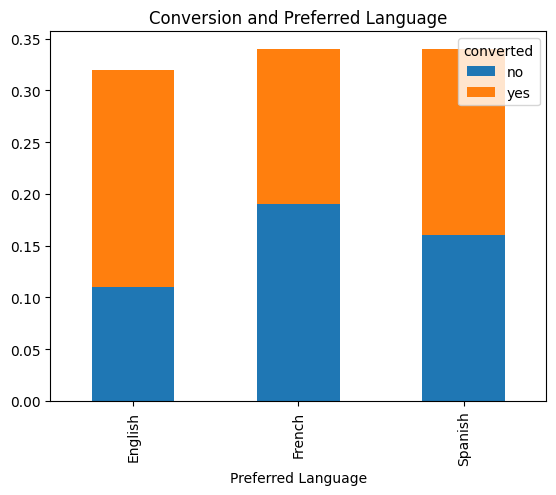

In [ ]:
# visual analysis
pd.crosstab(df.language_preferred,df.converted,normalize=True).plot(kind='bar',stacked=True)
plt.title('Conversion and Preferred Language')
plt.xlabel('Preferred Language');

- The conversion rate seems to be generally equal for preferred languages, French and Spanish.
- There seems to be a larger proportion of converters when the preferred language is English.
- Calculating the p-value will allow us to conclude if conversion status is independent (or dependent) of preferred language.

### Find p-value

In [ ]:
#import necessary function
from scipy.stats import chi2_contingency

#calculate p-value
chi, p_val_3, dof, expected_freq = chi2_contingency(contingency_table)
print('The p-value is ' + str(p_val_3))

The p-value is 0.2129888748754345


### Compare p-value to level of significance

- The p-value of ~0.21% is larger than the level of significance of 5%. We do not have enough evidence to reject the null hypothesis.

### Draw a conclusion
- We conclude that preferred language and conversion status are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

###Establish null and alternative hypothesis

- Let $\mu_1, \mu_2$ and $\mu_3$ represent the mean times spent on the new page for preferred languages, English, Spanish and French respectively.
- $H_0:$ $\mu_1 = \mu_2 = \mu_3$
- $H_A:$ At least one mean time spent on the new page, sorted by language, is different from the others.

###Data Visualization

In [ ]:
#find mean time spent on the new page for each language
print(treatment_group.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


Text(0, 0.5, 'Time Spent on the Page in Minutes')

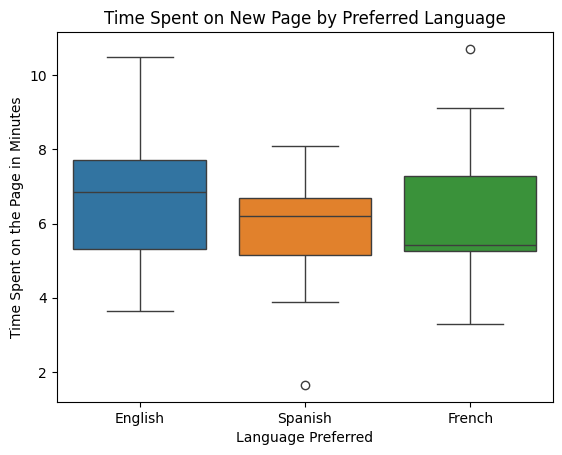

In [ ]:
#generate a boxplot
sns.boxplot(data=treatment_group, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred');
plt.title('Time Spent on New Page by Preferred Language')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page in Minutes')

### Choose an appropriate test
- An ANOVA test would be appropriate since we are investigating if there is a difference in means among more than 2 groups.

### Establish significance level
- Let α = 0.05.

###Data preparation
- We first must ensure that the assumptions of the ANOVA test have been met.
- The dependent variable (time spent on the page) follows a normal distribution - Yes, this was established on question 1, step 2.
- Equal variances - **To be established by performing Levene's Test on dependent variable.**
- Random sampling - Yes.

### **Levene's Test**

- $H_0:$ Population variances are equal
- $H_A:$ At least one variance is different from the rest

### Find p-value for Levene's test

In [ ]:
#import required function
from scipy.stats import levene

#slice data and calculate p-value
stat_4, p_val_4 = levene(treatment_group[treatment_group['language_preferred']=='Spanish']['time_spent_on_the_page'],
                         treatment_group[treatment_group['language_preferred']=='French']['time_spent_on_the_page'],
                         treatment_group[treatment_group['language_preferred']=='English']['time_spent_on_the_page'])
print(f"The p-value for the Levene's test is {round(p_val_4,3)}.")

The p-value for the Levene's test is 0.467.


- Since the p-value for the Levene's test is above our level of significance (5%), we do not have enough evidence to reject the null hypothesis. Thus, we conclude that the population variances are equal.
- We will proceed with the ANOVA test by creating variables that store the sliced data

In [ ]:
#construct variables to store time spent on new page, with respect to preferred language
time_spent_new_spanish = treatment_group[treatment_group['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_new_french = treatment_group[treatment_group['language_preferred']=='French']['time_spent_on_the_page']
time_spent_new_english = treatment_group[treatment_group['language_preferred']=='English']['time_spent_on_the_page']

### Calculate p-value for ANOVA test

In [ ]:
#import required function
from scipy.stats import f_oneway

stat_5, p_val_5 = f_oneway(time_spent_new_spanish, time_spent_new_french, time_spent_new_english)
print(f'The p-value is {round(p_val_5,3)}.')

The p-value is 0.432.


### Compare p-value to level of significance

- The p-value ~43% is above the level of significance of 5%.

### Draw a conclusion

- Thus, we do not have enough evidence to reject the null hypothesis. We conclude that the average time spent on the new page is the same for all language users.

## Conclusion and Business Recommendations

**Observations on sample data:**
- Users spent anywhere between 0.19 - 10.71 minutes on their respective landing page.
- On average, users spend more time on the new page than the old one.
  - Mean time spent on the old landing page = 4.53 minutes
  - Mean time spent on the new landing page = 6.22 minutes
-On average, users who converted to subscribers spent more time on their respective landing page than users who did not convert.
  - Mean time spent on landing page for users who converted = 6.62 minutes
  - Mean time spent on landing page for users who did not convert = 3.92 minutes

**Conclusions based on statistical evidence:**
- Statistical evidence (p-value of ~1.3x10^(-4) at 5% level of significance) suggests that the average time spent on the new landing page is greater than the time spent on the existing landing page.
- There is enough statistical evidence (p-value of 0.008 at a 5% level of significance) to conclude that the conversion rate for the new page is greater than the conversion rate of the old page.
- Statistical evidence (p-value of ~21% at 5% level of significance) supports that conversion status and preferred language are independent of each other.
- There is enough statistical evidence (p-value of ~43% at 5% level of significance) to support that the average time spent on the new page is the same across all language users.

**Recommendations:**
- Discontinue the use of the existing landing page and begin to implement the new one for all users.
- Strive to increase user engagement and time spent on the page to increase likelihood of users becoming subscribers.
- Have users take a short survey or answer a survey-like question after they use certain features of the website. This data can be used to improve user experience.

In [ ]:
!jupyter nbconvert --execute --to html '/content/COPY_of_ENews_Express_Learner_Notebook_Full_Code.ipynb'

[NbConvertApp] Converting notebook /content/COPY_of_ENews_Express_Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] Writing 985765 bytes to /content/COPY_of_ENews_Express_Learner_Notebook_Full_Code.html
